### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени
    -Временной ряд - цена зависит от предыдущей цены и от времени года
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В
    -Временной ряд - скорость зависит от предыдущей
    
    в) количество отказов компьютера
    -Временной ряд - вероятность отказов зависит от числа отказов до этого и от прошедшего времени с момента запуска
    
    г) число обращений в поликлинику по району
    -Временной ряд - число обращений в конкретный день связано с числом обращений в предыдущие дни (например, на прошлой неделе в тот же день)
    
    д) координаты автобуса при движении по маршруту
    -Не временной ряд - если не знать маршрут, то невозможно предсказать, когда автобус будет поворачивать
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
    -Не временной ряд - пойдёт нарушитель влево или вправо не предсказать

### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [22]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

In [15]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [16]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [18]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


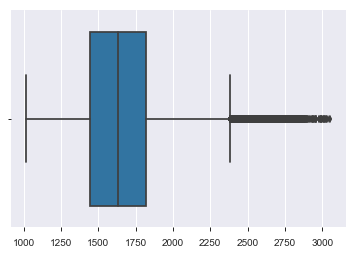

In [23]:
sns.boxplot(data.values)

In [19]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0,0.5,'МВт')

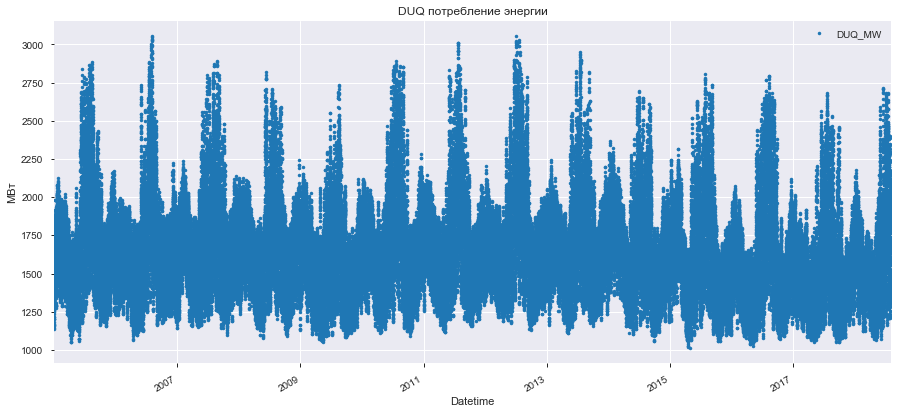

In [20]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [27]:
data['date'] = data.index
data.count() - data.nunique()

DUQ_MW    117186
date           4
dtype: int64

- Пропусков нет, но есть повторяющиеся даты (4 повтора)
- Данные имеют циклы

In [21]:
pandas_profiling.ProfileReport(data)

### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [62]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [63]:
brent_data.resample("W").apply(['mean', 'min', 'max']).head()

Значение              
                 mean    min    max
Дата                               
2010-09-05  76.616000  76.37  76.89
2010-09-12  77.673333  76.87  78.41
2010-09-19  78.693333  77.97  79.20
2010-09-26  78.518333  77.93  79.36
2010-10-03  81.211667  78.14  83.81

In [64]:
brent_data.resample("M").apply(['mean', 'min', 'max']).head()

Значение               
                 mean    min     max
Дата                                
2010-09-30  78.228148  76.37   82.11
2010-10-31  83.473462  80.89   85.30
2010-11-30  86.178077  83.00   89.00
2010-12-31  92.232308  88.92   94.59
2011-01-31  97.033200  93.72  100.56

### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [70]:
brent_data.resample("Y").apply(['mean', 'std']).head()

Значение           
                  mean        std
Дата                             
2010-12-31   84.963238   5.269065
2011-12-31  110.758746   7.021114
2012-12-31  111.377484   7.777702
2013-12-31  108.137114   4.014836
2014-12-31   99.435493  14.512923

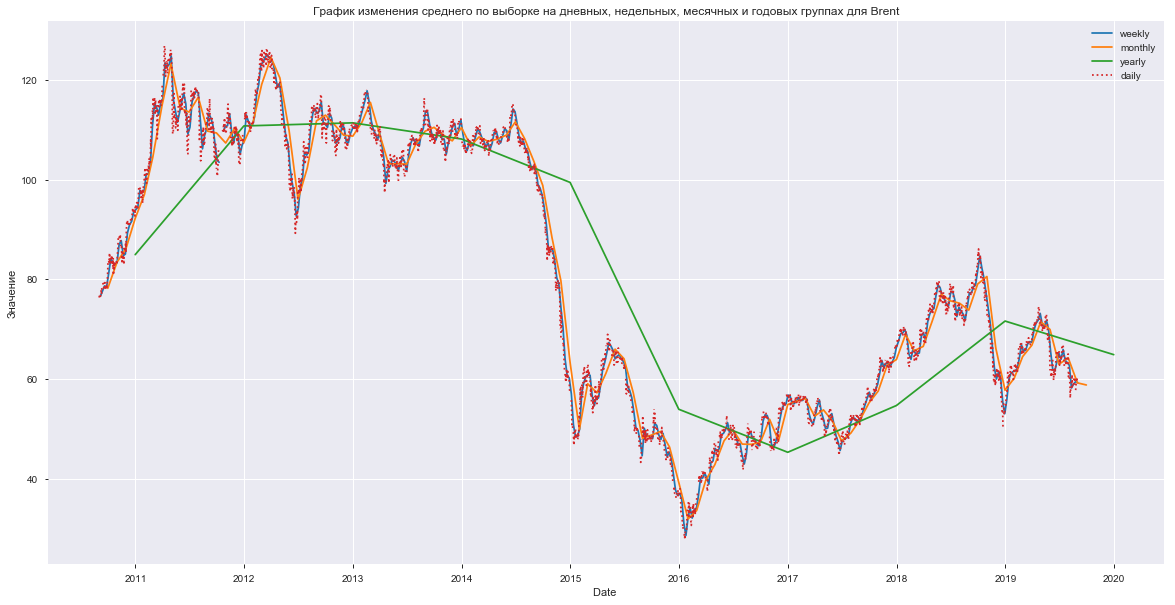

In [69]:
plt.figure(figsize=(20,10))
plt.plot(brent_data.resample("W").mean().index, brent_data.resample("W").mean().values)
plt.plot(brent_data.resample("M").mean().index, brent_data.resample("M").mean().values)
plt.plot(brent_data.resample("Y").mean().index, brent_data.resample("Y").mean().values)
# Для 5го задания
plt.plot(brent_data.resample("D").mean().index, brent_data.resample("D").mean().values, ':')


plt.legend(['weekly', 'monthly', 'yearly', 'daily'])

plt.title('График изменения среднего по выборке на дневных, недельных, месячных и годовых группах для Brent')
plt.xlabel('Date ')
plt.ylabel('Значение');

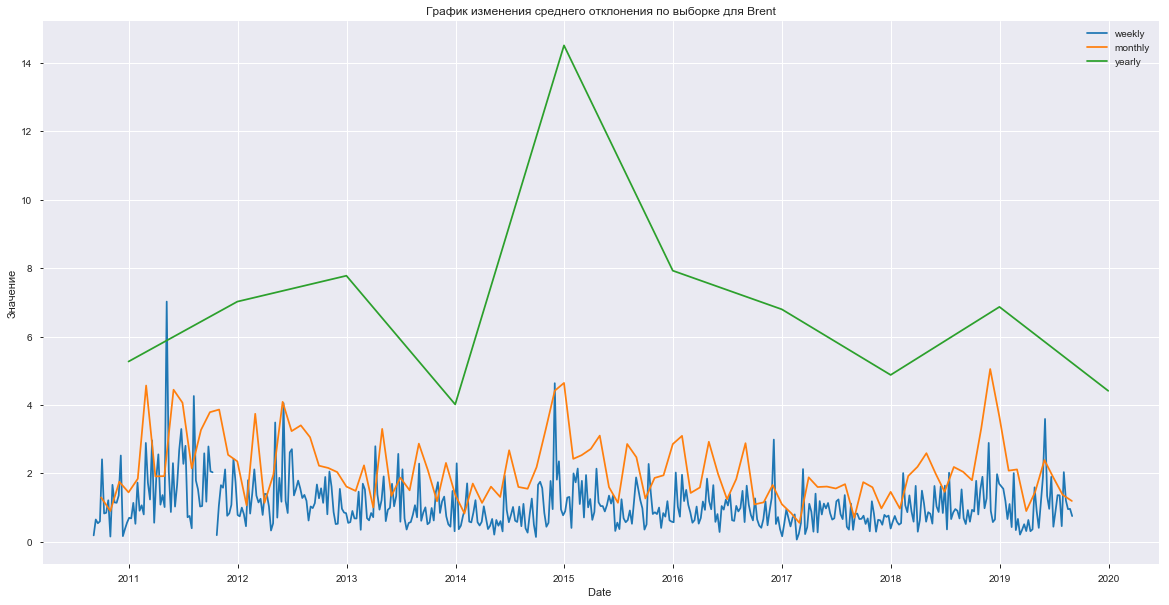

In [71]:
plt.figure(figsize=(20,10))
plt.plot(brent_data.resample("W").std().index, brent_data.resample("W").std().values)
plt.plot(brent_data.resample("M").std().index, brent_data.resample("M").std().values)
plt.plot(brent_data.resample("Y").std().index, brent_data.resample("Y").std().values)
plt.legend(['weekly', 'monthly', 'yearly'])
plt.title('График изменения среднего отклонения по выборке для Brent')
plt.xlabel('Date ')
plt.ylabel('Значение');

### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Если взять дневной график за основу, то недельный и месячный график - это сглаживание дневного графика. Причём недельный график визуально на целом графике практически совпадает, месячный же сглаживает сильнее, многие выбросы не видны. Годовой график лишь показывает общую тенденцию.